# Importing Modules

In [ ]:
import pandas as pd
import soundfile
import os, glob, pickle
import numpy as np
import sys

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
import seaborn as sbn
import matplotlib.pyplot as mplt
from sklearn import metrics

In [4]:
from IPython.display import Audio

In [5]:
import librosa
import librosa.display

In [6]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ravdess (reading data)

In [7]:
RavdessData = "C:\\Users\\User\\Downloads\\archive\\audio_speech_actors_01-24\\"

In [8]:
ravdess_directory_list = os.listdir(RavdessData)
file_emotion = []

file_path = []
for i in ravdess_directory_list:
    actor = os.listdir(RavdessData +"/"+ i)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file is emotion
        file_emotion.append(int(part[2]))
        file_path.append(RavdessData+"/" + i + '/' + file)
        
# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining 
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# int to emotion
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgusted', 8:'surprised'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:\Users\User\Downloads\archive\audio_speech_a...
1  neutral  C:\Users\User\Downloads\archive\audio_speech_a...
2  neutral  C:\Users\User\Downloads\archive\audio_speech_a...
3  neutral  C:\Users\User\Downloads\archive\audio_speech_a...
4     calm  C:\Users\User\Downloads\archive\audio_speech_a...

In [9]:
Ravdess_df["Emotions"].value_counts()

calm         192
happy        192
sad          192
angry        192
fear         192
disgusted    192
surprised    192
neutral       96
Name: Emotions, dtype: int64

In [10]:
df = pd.concat([Ravdess_df], axis = 0)
df.to_csv("data.csv",index=False)
df.head()

Emotions                                               Path
0  neutral  C:\Users\User\Downloads\archive\audio_speech_a...
1  neutral  C:\Users\User\Downloads\archive\audio_speech_a...
2  neutral  C:\Users\User\Downloads\archive\audio_speech_a...
3  neutral  C:\Users\User\Downloads\archive\audio_speech_a...
4     calm  C:\Users\User\Downloads\archive\audio_speech_a...

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df["Emotions"].value_counts()

calm         192
happy        192
sad          192
angry        192
fear         192
disgusted    192
surprised    192
neutral       96
Name: Emotions, dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='Emotions', ylabel='count'>

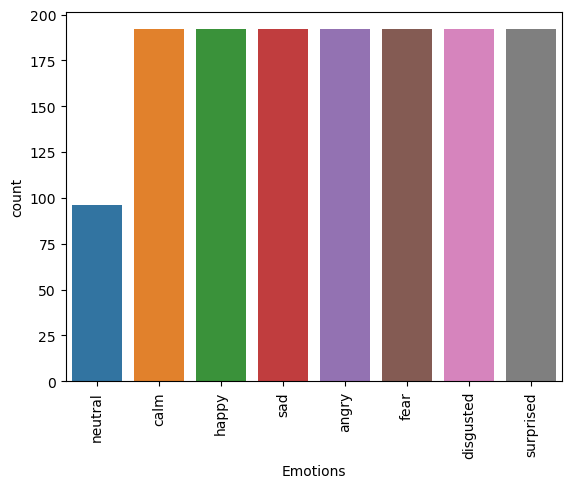

In [13]:
import matplotlib.pyplot as plt
plt.xticks( rotation='vertical')
sbn.countplot(df["Emotions"])

In [14]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

In [15]:
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

In [16]:
emot=["disgusted","fear","sad","happy","angry","neutral","surprised","calm"]

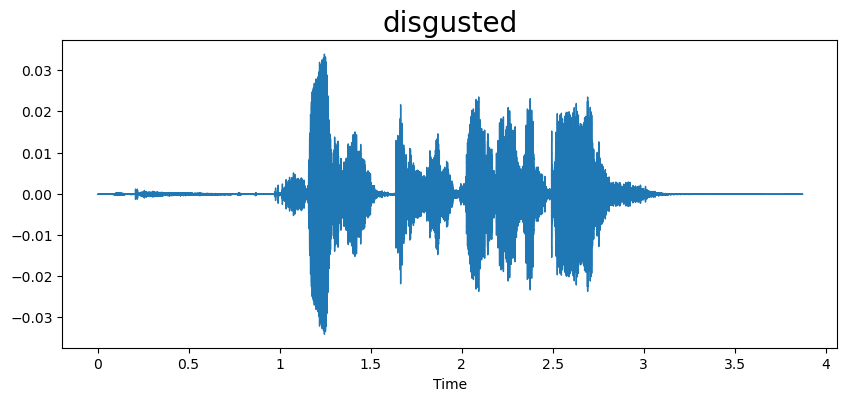

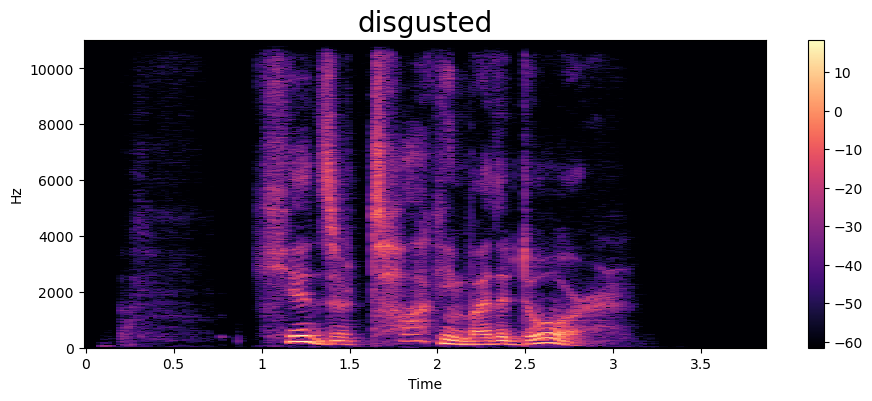

In [19]:
emotion=emot[0]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

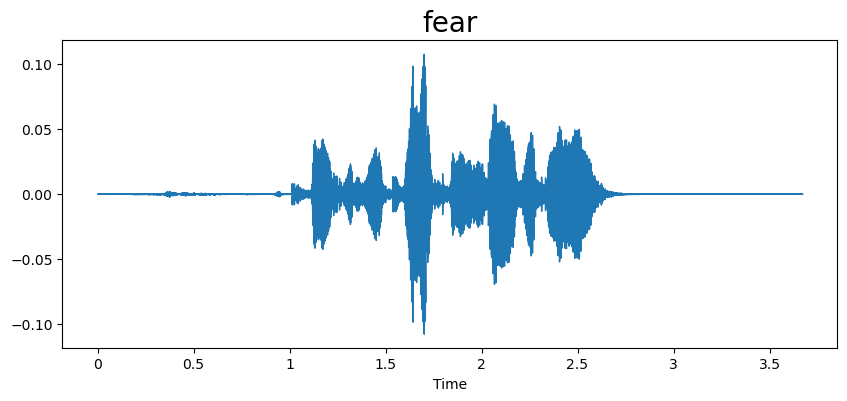

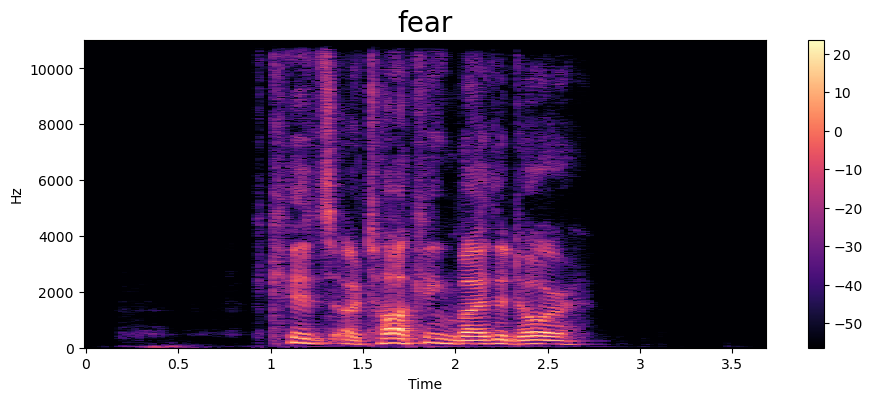

In [20]:
emotion=emot[1]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

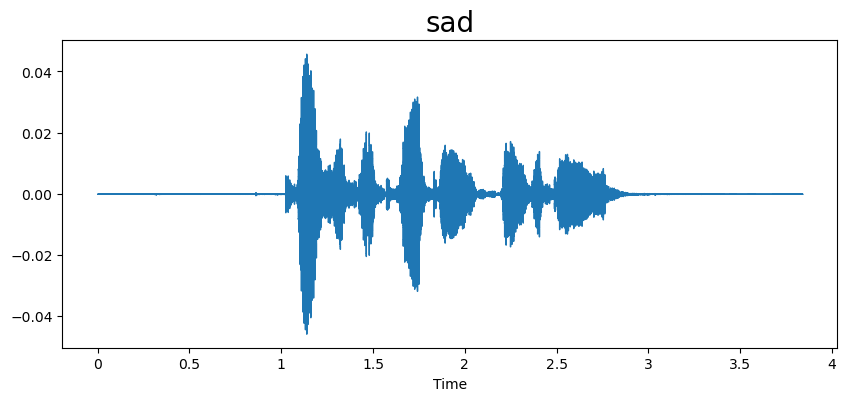

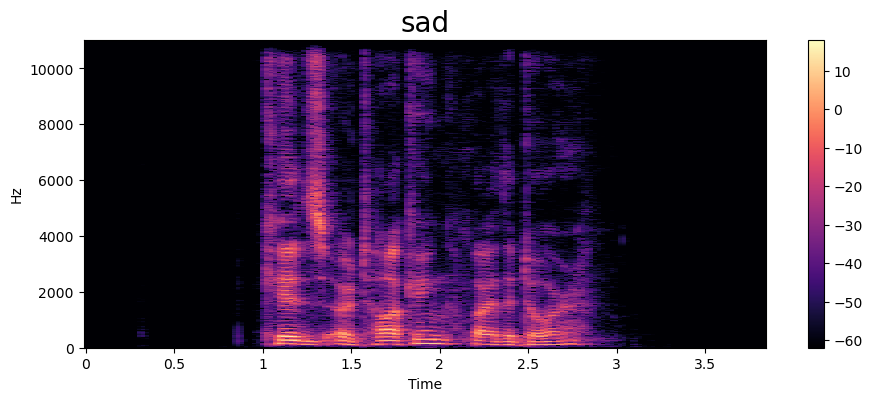

In [21]:
emotion=emot[2]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

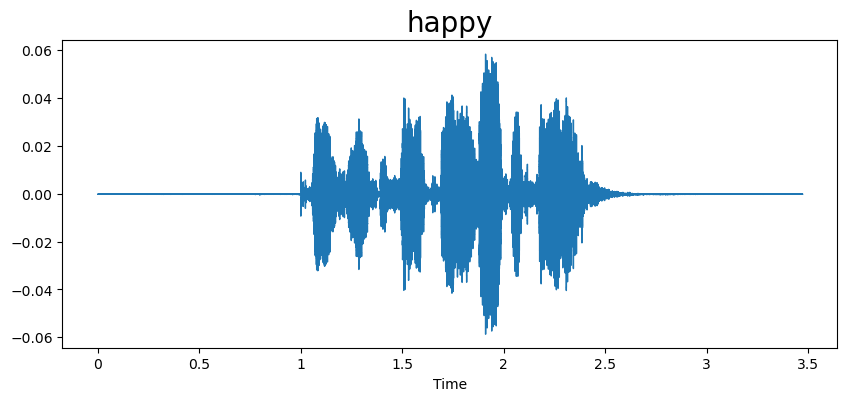

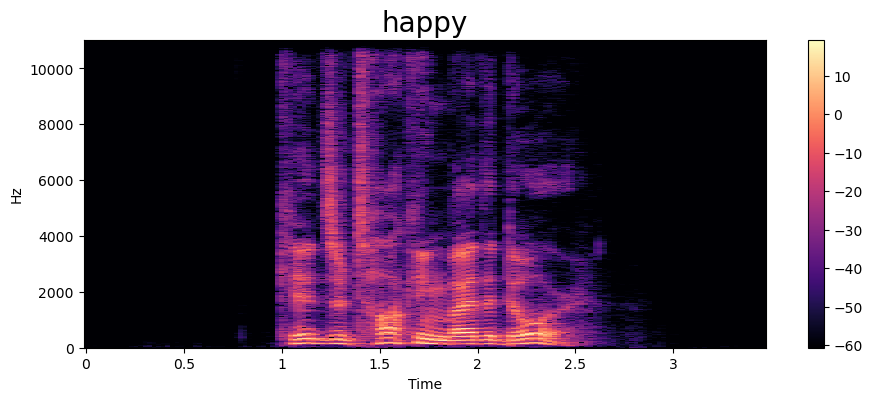

In [22]:
emotion=emot[3]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

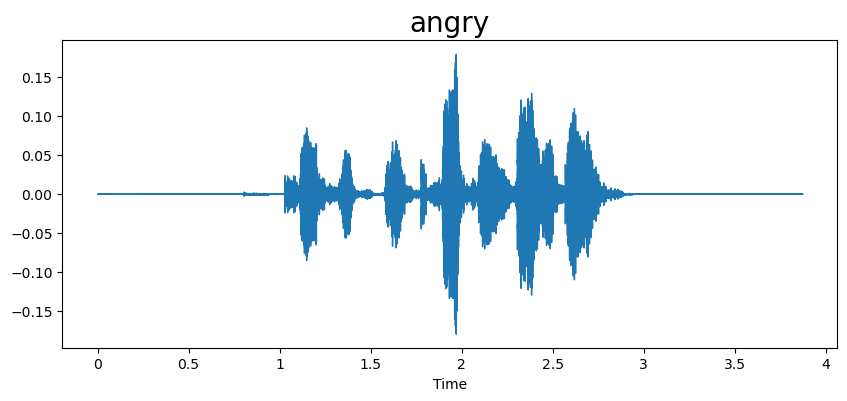

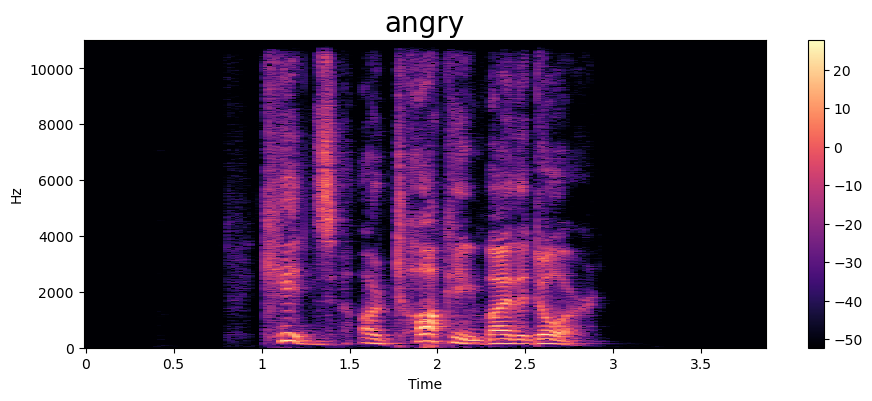

In [23]:
emotion=emot[4]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

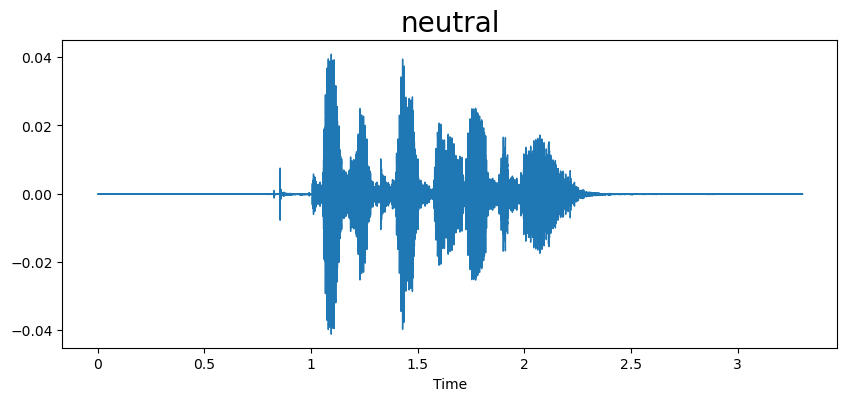

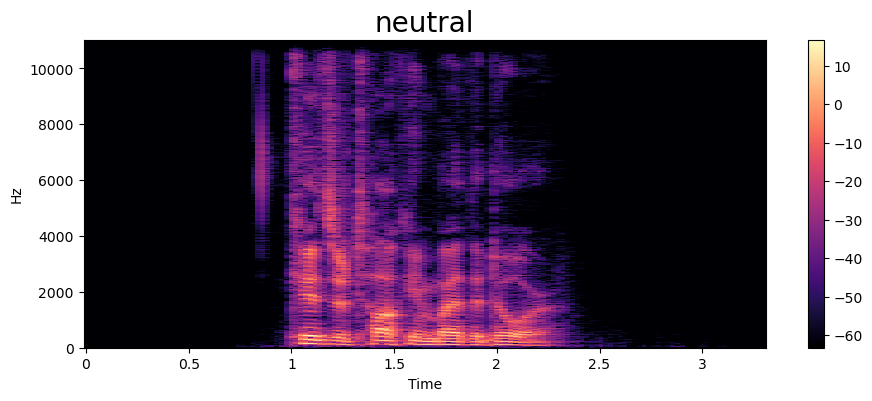

In [24]:
emotion=emot[5]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

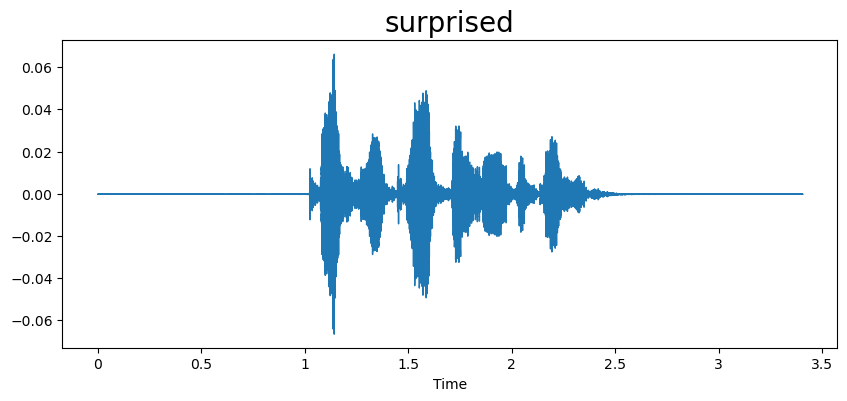

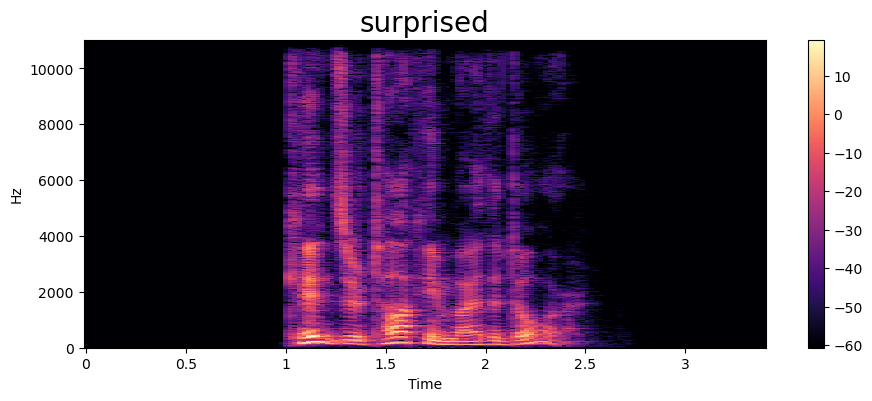

In [25]:
emotion=emot[6]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

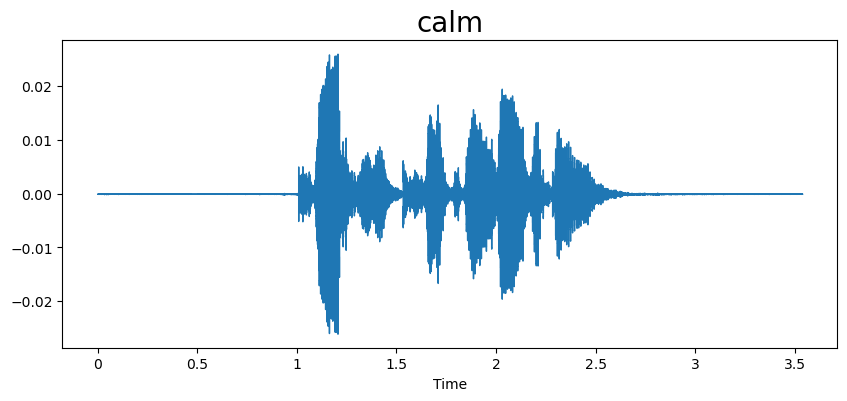

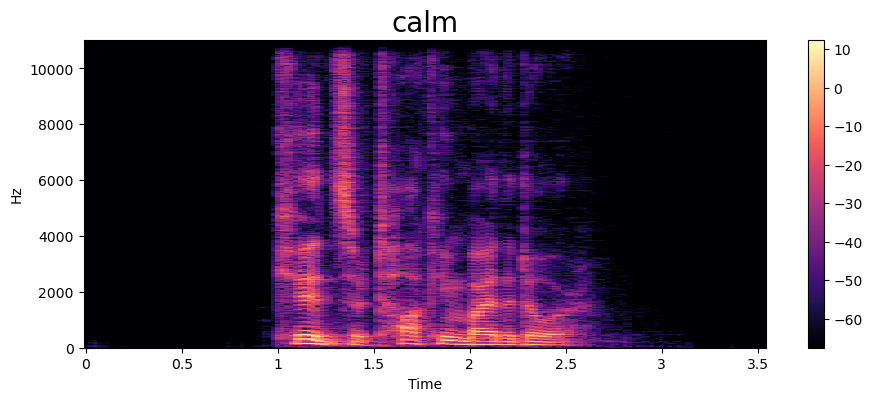

In [26]:
emotion=emot[7]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Data Augmentation

In [40]:
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data ,rate=0.8):
    #rate=0.75
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

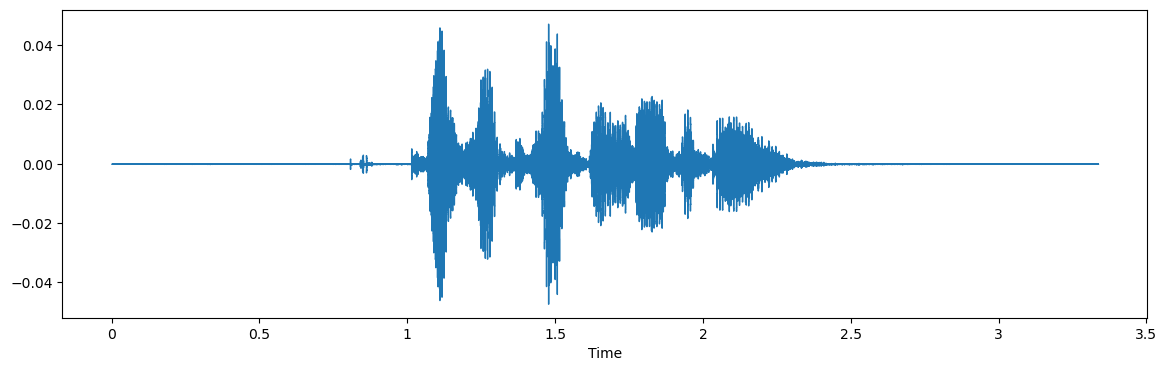

In [41]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

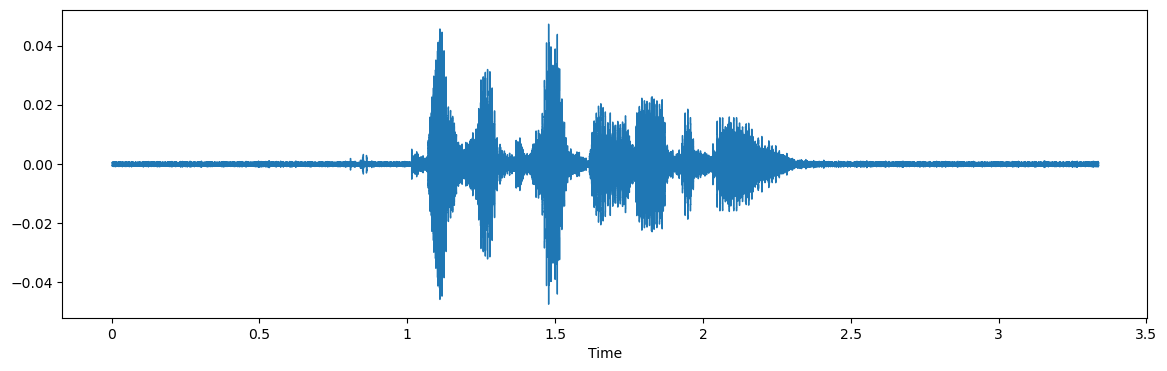

In [42]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

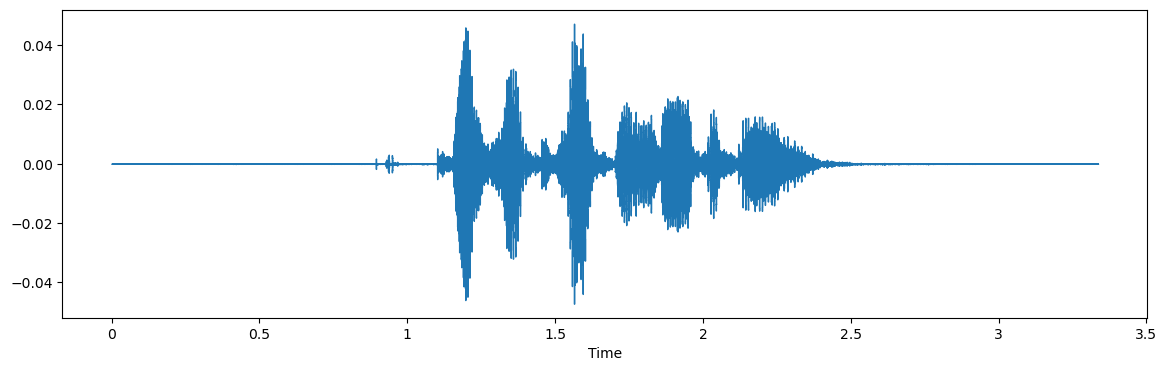

In [43]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [51]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def get_features(path):
    # duration and offset are used to take care of 
#     the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) 
    
    # stretching and pitching
    new_data = noise(data)
    data_stretch_pitch = shift(new_data)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) 
    
    return result

In [ ]:
X, Y = [], []

di=zip(df["Path"], df["Emotions"])
for path, emotion in di :
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [53]:
len(X), len(Y), df["Path"].shape

(99, 99, (1440,))

In [54]:
new_df = pd.DataFrame(X)
new_df['Emotions'] = Y
new_df.to_csv('dataframe.csv', index=False)
new_df.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.325810  0.818284  0.812652  0.801196  0.834922  0.801746  0.682764   
2  0.329228  0.803106  0.826510  0.817768  0.820423  0.819096  0.716109   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.331624  0.788964  0.832199  0.822220  0.792648  0.792535  0.742653   

          7         8         9  ...       153       154       155       156  \
0  0.684966  0.733049  0.753972  ...  0.000004  0.000003  0.000002  0.000002   
1  0.700933  0.745534  0.772280  ...  0.000074  0.000081  0.000075  0.000074   
2  0.678244  0.726601  0.755284  ...  0.000096  0.000088  0.000083  0.000092   
3  0.628977  0.679179  0.707283  ...  0.000007  0.000007  0.000007  0.000007   
4  0.655028  0.708551  0.744207  ...  0.000139  0.000138  0.000145  0.000148   

        157       158       159       160           161  Emotions  
0  0.000005  0.000008  0.000007  0.000005  4.245834e-07   neutral  
1  0.000081  0.000084  0.000086  0.000078  7.209978e-05   neutral  
2  0.000095  0.000100  0.000091  0.000093  8.613856e-05   neutral  
3  0.000012  0.000010  0.000011  0.000006  4.254087e-07   neutral  
4  0.000140  0.000142  0.000139  0.000144  1.404371e-04   neutral  

[5 rows x 163 columns]

# Data Preparation

In [56]:
X = new_df.iloc[: ,:-1].values
Y = new_df['Emotions'].values

In [57]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [58]:
from sklearn.model_selection import train_test_split
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20 , shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((79, 162), (79, 5), (20, 162), (20, 5))

In [59]:
from sklearn.preprocessing import StandardScaler
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((79, 162), (79, 5), (20, 162), (20, 5))

In [60]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [61]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((79, 162, 1), (79, 5), (20, 162, 1), (20, 5))

In [68]:
#import keras
#from keras.models import Sequential
